In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../Datasets/titanic.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
embarked_grp = df.groupby(by='Embarked')

In [5]:
embarked_grp['Survived'].value_counts()

Embarked  Survived
C         1            93
          0            75
Q         0            47
          1            30
S         0           427
          1           217
Name: count, dtype: int64

In [6]:
df.drop(columns=['Cabin','SibSp','Parch','Name','PassengerId','Ticket','Fare'], inplace=True)

In [7]:
df.head()

,Survived,Pclass,Sex,Age,Embarked
0,0,3,male,22.0,S
1,1,1,female,38.0,C
2,1,3,female,26.0,S
3,1,1,female,35.0,S
4,0,3,male,35.0,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [9]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [10]:
df['Embarked'].fillna('S',inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  891 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB


In [12]:
# Fill the Age with normally distributed data
index = df[df['Age'].isna()].index
values = np.random.normal(loc=df['Age'].mean(), scale=(0.2*df['Age'].std()), size=df['Age'].isna().sum())

df['Age'].fillna(pd.Series(values, index=index), inplace=True)

In [13]:
df['Age'].fillna( df['Age'].median(), inplace=True )

In [14]:
df['Age'] = df['Age'].astype('int')

In [15]:
df['Age'].std()

13.084402505385455

In [16]:
df['Age'].unique()

array([22, 38, 26, 35, 30, 54,  2, 27, 14,  4, 58, 20, 39, 55, 31, 34, 15,
       28,  8, 19, 40, 66, 42, 32, 21, 18,  3, 37,  7, 49, 29, 65,  5, 11,
       45, 25, 33, 17, 16,  0, 23, 24, 46, 59, 71, 47, 70, 12,  9, 36, 51,
       44,  1, 61, 56, 50, 62, 41, 52, 63, 43, 60, 10, 64, 13, 48, 53, 57,
       80,  6, 74])

<Axes: xlabel='Sex', ylabel='Survived'>

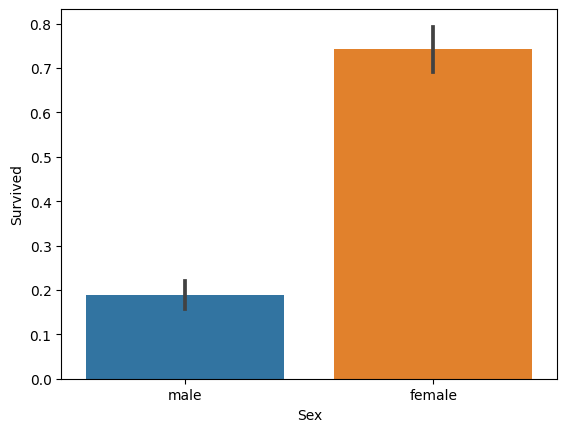

In [17]:
sns.barplot(x='Sex', y='Survived', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

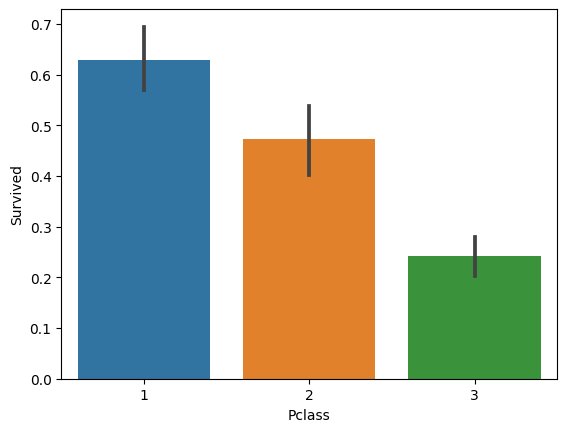

In [18]:
sns.barplot(x='Pclass', y='Survived', data=df)

<Axes: xlabel='Survived', ylabel='Age'>

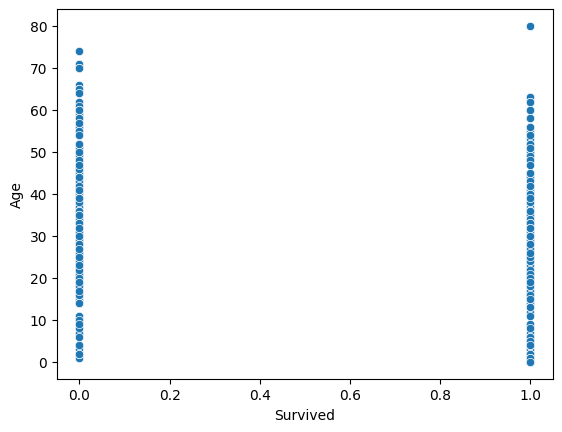

In [19]:
sns.scatterplot(x='Survived', y='Age', data=df)

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>, <Axes: >]], dtype=object)

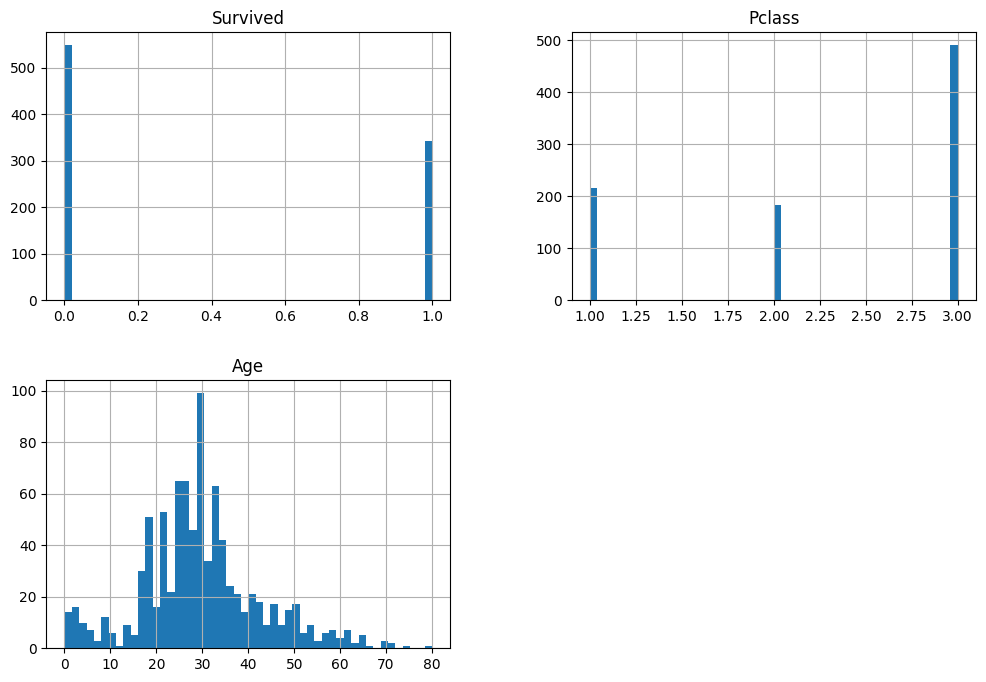

In [20]:
df.hist(bins=50, figsize=(12,8))

### Machine Learning Stuff

In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, confusion_matrix

In [22]:
# Make new feature to categorize the age feature
df['Age_Category'] = pd.cut(
    df['Age'],
    bins=[0, 15, 30, 45, 60, 75, 100],
    labels=[1, 2, 3, 4, 5, 6]
    )

<Axes: >

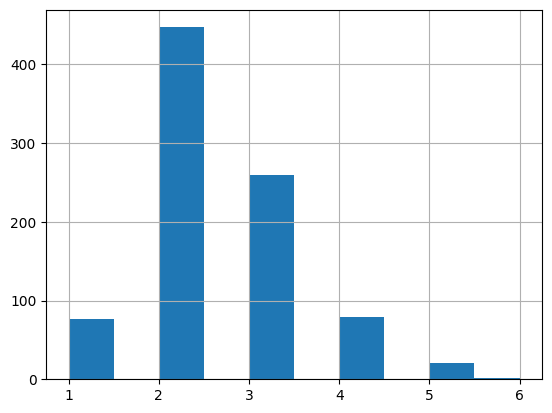

In [23]:
df['Age_Category'].hist()

In [24]:
# Sex encoding (Ordinal)
oridinal_enc = OrdinalEncoder()
df['Sex'] = oridinal_enc.fit_transform(df[['Sex']])

In [25]:
# Embarked encoding (Get Dummies)
emb = pd.get_dummies( df['Embarked']).astype('int')

In [26]:
df = pd.concat([df,emb], axis=1)

In [27]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Embarked', 'Age_Category', 'C',
       'Q', 'S'],
      dtype='object')

In [28]:
df.drop(columns=['Embarked','Age'], inplace=True)

In [29]:
df.head()

,Survived,Pclass,Sex,Age_Category,C,Q,S
0,0,3,1.0,2,0,0,1
1,1,1,0.0,3,1,0,0
2,1,3,0.0,2,0,0,1
3,1,1,0.0,3,0,0,1
4,0,3,1.0,3,0,0,1


In [30]:
df['Sex'] = df['Sex'].astype('int')

In [31]:
# Checking Correlations with Sex Feature
corr_matrix = df.corr()
corr_matrix['Survived'].sort_values(ascending=False)

Survived        1.000000
C               0.168240
Q               0.003650
Age_Category   -0.021448
S              -0.149683
Pclass         -0.338481
Sex            -0.543351
Name: Survived, dtype: float64

In [32]:
df['Age_Category'].fillna( 2, inplace=True )
# df['Age_Category'].value_counts()

In [33]:
# Feature Generation
df['Age_Class'] = df['Age_Category'].astype('int') * df['Pclass']

In [34]:
df.head()

,Survived,Pclass,Sex,Age_Category,C,Q,S,Age_Class
0,0,3,1,2,0,0,1,6
1,1,1,0,3,1,0,0,3
2,1,3,0,2,0,0,1,6
3,1,1,0,3,0,0,1,3
4,0,3,1,3,0,0,1,9


In [35]:
# Splitting when finishing Data cleaning

X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [36]:
df['Age_Class'].value_counts()

Age_Class
6     350
4     133
9     129
3     127
2      94
8      20
5      13
12     12
15      5
1       5
10      3
Name: count, dtype: int64

In [37]:
# ML Pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', RandomForestClassifier())
])


In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', RandomForestClassifier())])

In [39]:
pred = pipe.predict(X_test)

In [40]:
decision_mar = mean_absolute_error(y_test, pred)

In [41]:
decision_mar

0.19553072625698323

In [42]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', RandomForestClassifier())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': RandomForestClassifier(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__bootstrap': True,
 'model__ccp_alpha': 0.0,
 'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': None,
 'model__max_features': 'sqrt',
 'model__max_leaf_nodes': None,
 'model__max_samples': None,
 'model__min_impurity_decrease': 0.0,
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__min_weight_fraction_leaf': 0.0,
 'model__n_estimators': 100,
 'model__n_jobs': None,
 'model__oob_score': False,
 'model__random_state': None,
 'model__verbose': 0,
 'model__warm_start': False}

In [43]:
# Grid Search
p_grid = [
    {'n_estimators': [3, 15, 30, 40, 50, 70, 80, 100]}
]

mod = grid_search = GridSearchCV(
    pipe,
    param_grid= {'model__n_estimators': [3, 15, 30, 40, 50, 70, 80, 100]},
    cv=10, 
    return_train_score=True
    )

mod.fit(X, y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', RandomForestClassifier())]),
             param_grid={'model__n_estimators': [3, 15, 30, 40, 50, 70, 80,
                                                 100]},
             return_train_score=True)

In [44]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.006564,0.000820,0.001700,4.581311e-04,3,{'model__n_estimators': 3},0.788889,0.808989,0.797753,0.797753,...,0.822943,0.820449,0.805486,0.819202,0.826683,0.829177,0.821696,0.812968,0.820676,0.006586
1,0.019367,0.000606,0.002701,4.585116e-04,15,{'model__n_estimators': 15},0.800000,0.797753,0.786517,0.853933,...,0.829177,0.822943,0.819202,0.826683,0.826683,0.829177,0.824190,0.825436,0.825789,0.002885
2,0.035141,0.000518,0.003401,4.900085e-04,30,{'model__n_estimators': 30},0.811111,0.808989,0.797753,0.808989,...,0.829177,0.822943,0.819202,0.825436,0.825436,0.829177,0.822943,0.826683,0.825539,0.002967
3,0.048870,0.004447,0.004170,3.451798e-04,40,{'model__n_estimators': 40},0.800000,0.808989,0.797753,0.797753,...,0.829177,0.822943,0.819202,0.826683,0.826683,0.829177,0.824190,0.826683,0.826038,0.002951
4,0.057446,0.001008,0.004901,2.999549e-04,50,{'model__n_estimators': 50},0.800000,0.808989,0.797753,0.797753,...,0.829177,0.822943,0.819202,0.826683,0.826683,0.829177,0.824190,0.825436,0.825914,0.002947
5,0.077774,0.001429,0.006001,5.352484e-07,70,{'model__n_estimators': 70},0.811111,0.808989,0.797753,0.853933,...,0.829177,0.822943,0.819202,0.826683,0.826683,0.829177,0.824190,0.826683,0.826038,0.002951
6,0.088194,0.000724,0.006502,5.001547e-04,80,{'model__n_estimators': 80},0.800000,0.808989,0.786517,0.797753,...,0.829177,0.822943,0.819202,0.826683,0.826683,0.829177,0.824190,0.826683,0.826038,0.002951
7,0.108750,0.000592,0.008178,2.716423e-04,100,{'model__n_estimators': 100},0.800000,0.808989,0.797753,0.797753,...,0.829177,0.822943,0.819202,0.826683,0.826683,0.829177,0.824190,0.826683,0.826038,0.002951


In [45]:
mod.best_params_

{'model__n_estimators': 70}

In [46]:
X_train

,Pclass,Sex,Age_Category,C,Q,S,Age_Class
146,3,1,2,0,0,1,6
195,1,0,4,1,0,0,4
786,3,0,2,0,0,1,6
290,1,0,2,0,0,1,2
521,3,1,2,0,0,1,6
...,...,...,...,...,...,...,...
256,1,0,2,1,0,0,2
643,3,1,3,0,0,1,9
249,2,1,4,0,0,1,8
664,3,1,2,0,0,1,6


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Survived      891 non-null    int64   
 1   Pclass        891 non-null    int64   
 2   Sex           891 non-null    int32   
 3   Age_Category  891 non-null    category
 4   C             891 non-null    int32   
 5   Q             891 non-null    int32   
 6   S             891 non-null    int32   
 7   Age_Class     891 non-null    int64   
dtypes: category(1), int32(4), int64(3)
memory usage: 36.0 KB


In [47]:
clf = RandomForestClassifier(
    n_estimators=50,
    min_samples_split=10,
    min_samples_leaf=1,
    max_features='auto',
    oob_score=True,
    random_state=1,
)

clf.fit(X_train, y_train)

e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', min_samples_split=10,
                       n_estimators=50, oob_score=True, random_state=1)

In [48]:
RF_Acc = round(clf.score(X_test, y_test)*100, 2)
RF_Acc

78.21

In [49]:
res_RF = cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy')


e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

In [50]:
y_pred = cross_val_predict(clf, X_train, y_train, cv=10)

e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
e:\Programming\Python\Files\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default v

<Axes: >

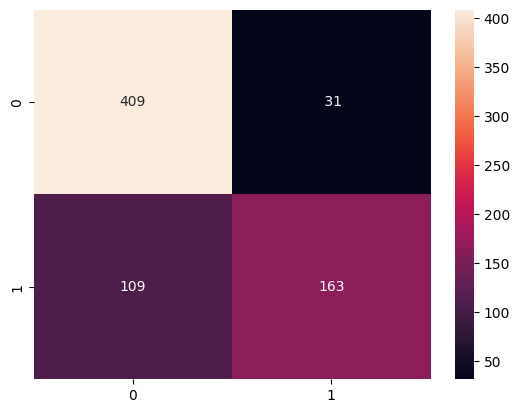

In [51]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_train,y_pred), annot=True, fmt='3.0f')